# Group-31_Python Project:

### Venkat Mahendra Chimmili - 50415062
### Manikanta Alluri - 50415080
### Krishna Babu Vakkapatla - 50432420

# Data Base Connection and libraries import

In [1]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
#import plotly.express as px
from sklearn.model_selection import train_test_split
import random
np.random.seed(12345)

def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

# Data Base Tables creation and Normalization

In [2]:
def normalize_database(data_filename):
    global conn
    conn=sqlite3.connect('normalized.db',False)
    cur = conn.cursor()
    
    df=pd.read_csv("heart1.csv")
    
    
    with conn:
        create_table_sql1="CREATE TABLE if not exists sex (sex_id integer PRIMARY KEY,sex TEXT NOT NULL );"
        create_table(conn,create_table_sql1)
        
        create_table_sql1="CREATE TABLE if not exists ChestPainType (ChestPainType_id integer PRIMARY KEY,ChestPainType TEXT NOT NULL );"
        create_table(conn,create_table_sql1)
        
        create_table_sql1="CREATE TABLE if not exists FastingBS (FastingBS_id integer PRIMARY KEY,FastingBS TEXT NOT NULL );"
        create_table(conn,create_table_sql1)
        
        create_table_sql1="CREATE TABLE if not exists RestingECG (RestingECG_id integer PRIMARY KEY,RestingECG TEXT NOT NULL );"
        create_table(conn,create_table_sql1)
        
        create_table_sql1="CREATE TABLE if not exists ExerciseAngina (ExerciseAngina_id integer PRIMARY KEY,ExerciseAngina TEXT NOT NULL );"
        create_table(conn,create_table_sql1)
        
        create_table_sql1="CREATE TABLE if not exists ST_Slope (ST_Slope_id integer PRIMARY KEY,ST_Slope TEXT NOT NULL );"
        create_table(conn,create_table_sql1)
        
    sex=df.iloc[:,1]
    sex=set(sex)
    count=range(0,len(sex))
    final_data=zip(count,sex)
    with conn:
        cur.executemany("INSERT or replace INTO sex ('sex_id','sex') VALUES (?,?)",final_data)
            
       
            
    chestpain=df.iloc[:,2]
    chestpain=set(chestpain)
    count=range(0,len(chestpain))
    final_data=zip(count,chestpain)
    with conn:
        cur.executemany("INSERT or replace INTO ChestPainType ('ChestPainType_id','ChestPainType') VALUES (?,?)",final_data)
            
        
    fasting_id=df.iloc[:,5]
    fasting_id=set(fasting_id)
    count=range(0,len(fasting_id))
    final_data=zip(count,fasting_id)
    with conn:
        cur.executemany("INSERT or replace INTO FastingBS ('FastingBS_id','FastingBS') VALUES (?,?)",final_data)
        
    rest_id=df.iloc[:,6]
    rest_id=set(rest_id)
    count=range(0,len(rest_id))
    final_data=zip(count,rest_id)
    with conn:
        cur.executemany("INSERT or replace INTO RestingECG ('RestingECG_id','RestingECG') VALUES (?,?)",final_data)
       
    rest_id=df.iloc[:,8]
    rest_id=set(rest_id)
    count=range(0,len(rest_id))
    final_data=zip(count,rest_id)
    with conn:
        cur.executemany("INSERT or replace INTO ExerciseAngina ('ExerciseAngina_id','ExerciseAngina') VALUES (?,?)",final_data)
       
    slope_id=df.iloc[:,10]
    slope_id=set(slope_id)
    count=range(0,len(slope_id))
    final_data=zip(count,slope_id)
    with conn:
        cur.executemany("INSERT or replace INTO ST_Slope ('ST_Slope_id','ST_Slope') VALUES (?,?)",final_data)
            
    stmt="select * from sex;"
    data=execute_sql_statement(stmt,conn)
    sex={}
    for i in data:
        sex[i[1]]=i[0]

    stmt="select * from ChestPainType;"
    data=execute_sql_statement(stmt,conn)
    ChestPainType={}
    for i in data:
        ChestPainType[i[1]]=i[0]

    stmt="select * from FastingBS;"
    data=execute_sql_statement(stmt,conn)
    FastingBS={}
    for i in data:
        FastingBS[i[1]]=i[0]

    stmt="select * from RestingECG;"
    data=execute_sql_statement(stmt,conn)
    RestingECG={}
    for i in data:
        RestingECG[i[1]]=i[0]

    stmt="select * from ExerciseAngina;"
    data=execute_sql_statement(stmt,conn)
    ExerciseAngina={}
    for i in data:
        ExerciseAngina[i[1]]=i[0]

    stmt="select * from ST_Slope;"
    data=execute_sql_statement(stmt,conn)
    ST_Slope={}
    for i in data:
        ST_Slope[i[1]]=i[0]

    
    with conn:
        drop_table="drop table if exists Heart_Disease";
        execute_sql_statement(drop_table,conn)
        create_table_sql1="CREATE TABLE if not exists Heart_Disease (patient_id integer PRIMARY KEY autoincrement,age number not null,sex varchar not null,ChestPainType number not null,RestingBP number not null,Cholesterol number not null,FastingBS number not null,RestingECG number not null,MaxHR number not null,ExerciseAngina number not null, Oldpeak number not null,ST_Slope number NOT NULL, HeartDisease number not null, foreign key(sex) references sex(sex), foreign key(ChestPainType) references ChestPainType(ChestPainType),foreign key(FastingBS) references FastingBS(FastingBS),foreign key(RestingECG) references RestingECG(RestingECG),foreign key(ExerciseAngina) references ExerciseAngina(ExerciseAngina),foreign key(ST_Slope) references ST_Slope(ST_Slope));"
        create_table(conn,create_table_sql1)

    with open('heart1.csv') as file:
        next(file)
        data=file.readlines()

    final=[]

    for i in data:
        i=i.split(",")
        age=(i[0])
        Sex=str(sex[i[1]])
        ctype=(ChestPainType[i[2]])
        rbp=(i[3])
        chol=(i[4])
        fbs=(FastingBS[i[5]])
        rcg=(RestingECG[i[6]])
        mhr=(i[7])
        exercise=(ExerciseAngina[i[8]])
        opeak=(i[9])
        oslope=(ST_Slope[i[10]])
        hdis=(i[11].replace("\n",""))
        
        final.append([age,Sex,ctype,rbp,chol,fbs,rcg,mhr,exercise,opeak,oslope,hdis])


    


    with conn:
        cur.executemany("INSERT or replace INTO Heart_Disease('age','sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease') VALUES (?,?,?,?,?,?,?,?,?,?,?,?)",final)

    global df1
    global df3
    stmt="SELECT * from Heart_Disease;"
    df1=pd.read_sql_query(stmt,conn)
    df3=pd.read_sql_query(stmt,conn)
    display(df1)
    m={'1':'male','0':'female'}
    df1['sex']=df1['sex'].map(m)
    
    

In [3]:
normalize_database('heart1.csv')

patient_id  age sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0             1   40   1              2        140          289          0   
1             2   49   0              0        160          180          0   
2             3   37   1              2        130          283          0   
3             4   48   0              3        138          214          0   
4             5   54   1              0        150          195          0   
..          ...  ...  ..            ...        ...          ...        ...   
913         914   45   1              1        110          264          0   
914         915   68   1              3        144          193          1   
915         916   57   1              3        130          131          0   
916         917   57   0              2        130          236          0   
917         918   38   1              0        138          175          0   

     RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0             0    172               0      0.0         1             0  
1             0    156               0      1.0         2             1  
2             2     98               0      0.0         1             0  
3             0    108               1      1.5         2             1  
4             0    122               0      0.0         1             0  
..          ...    ...             ...      ...       ...           ...  
913           0    132               0      1.2         2             1  
914           0    141               0      3.4         2             1  
915           0    115               1      1.2         2             1  
916           1    174               0      0.0         2             1  
917           0    173               0      0.0         1             0  

[918 rows x 13 columns]

In [4]:
df3.describe()

patient_id         age  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean   459.500000   53.510893       2.047930  132.396514   198.799564   
std    265.148072    9.432617       1.214189   18.514154   109.384145   
min      1.000000   28.000000       0.000000    0.000000     0.000000   
25%    230.250000   47.000000       1.000000  120.000000   173.250000   
50%    459.500000   54.000000       3.000000  130.000000   223.000000   
75%    688.750000   60.000000       3.000000  140.000000   267.000000   
max    918.000000   77.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.592593  136.809368        0.404139    0.887364   
std      0.423046    0.793670   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0.000000   -2.600000   
25%      0.000000    0.000000  120.000000        0.000000    0.000000   
50%      0.000000    0.000000  138.000000        0.000000    0.600000   
75%      0.000000    1.000000  156.000000        1.000000    1.500000   
max      1.000000    2.000000  202.000000        1.000000    6.200000   

         ST_Slope  HeartDisease  
count  918.000000    918.000000  
mean     1.432462      0.553377  
std      0.618959      0.497414  
min      0.000000      0.000000  
25%      1.000000      0.000000  
50%      2.000000      1.000000  
75%      2.000000      1.000000  
max      2.000000      1.000000

In [5]:
df3.head(10)

patient_id  age sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0           1   40   1              2        140          289          0   
1           2   49   0              0        160          180          0   
2           3   37   1              2        130          283          0   
3           4   48   0              3        138          214          0   
4           5   54   1              0        150          195          0   
5           6   39   1              0        120          339          0   
6           7   45   0              2        130          237          0   
7           8   54   1              2        110          208          0   
8           9   37   1              3        140          207          0   
9          10   48   0              2        120          284          0   

   RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0           0    172               0      0.0         1             0  
1           0    156               0      1.0         2             1  
2           2     98               0      0.0         1             0  
3           0    108               1      1.5         2             1  
4           0    122               0      0.0         1             0  
5           0    170               0      0.0         1             0  
6           0    170               0      0.0         1             0  
7           0    142               0      0.0         1             0  
8           0    130               1      1.5         2             1  
9           0    120               0      0.0         1             0

# Visualizations

# Heart Disease Total count with Yes or No

/Users/venkat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


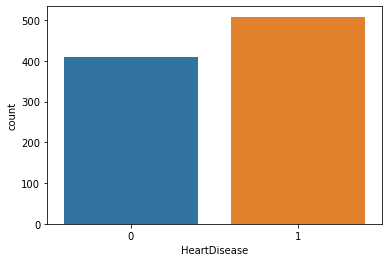

In [6]:
sns.countplot(df1['HeartDisease']);

# Distribution of Heart Diseases w.r.t ST_Slope

ST_Slope  HeartDisease  count
0     Down             0     14
1     Down             1     49
2       Up             0    317
3       Up             1     78
4     Flat             0     79
5     Flat             1    381

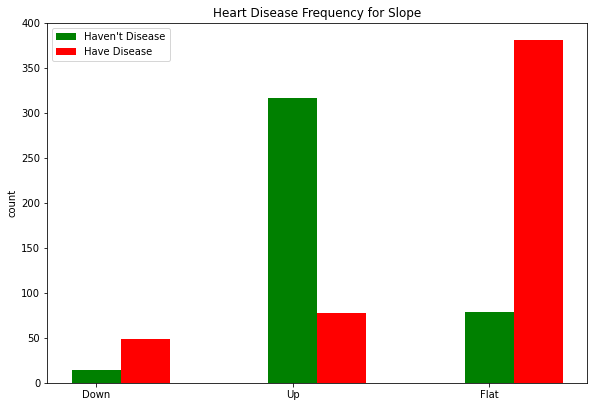

In [7]:
sql_statement="""select distinct b.ST_Slope,a.HeartDisease, count(a.HeartDisease) count from Heart_Disease a
                inner join ST_Slope b on b.ST_Slope_id=a.ST_Slope
                group by a.ST_Slope,a.HeartDisease
    """
df2 = pd.read_sql_query(sql_statement, conn)
display(df2)

t_1 = df2[ df2['HeartDisease'] == 0 ]['count']
t_2 = df2[ df2['HeartDisease'] == 1 ]['count']
Labels=df2.ST_Slope.drop_duplicates()
X=np.arange(len(Labels))

fig = plt.figure()
ax = fig.add_axes([0.25,0.25,1.25,1.25])
ax.bar(X + 0.00, t_1, color = 'g', width = 0.25)
ax.bar(X + 0.25, t_2, color = 'r', width = 0.25)
plt.xticks(X, Labels)
plt.title('Heart Disease Frequency for Slope')
plt.ylabel('count')
plt.legend(["Haven't Disease", "Have Disease"])

# Distribution of Heart Diseases with respect to Sex

sex  HeartDisease  count
0   F             0    143
1   F             1     50
2   M             0    267
3   M             1    458

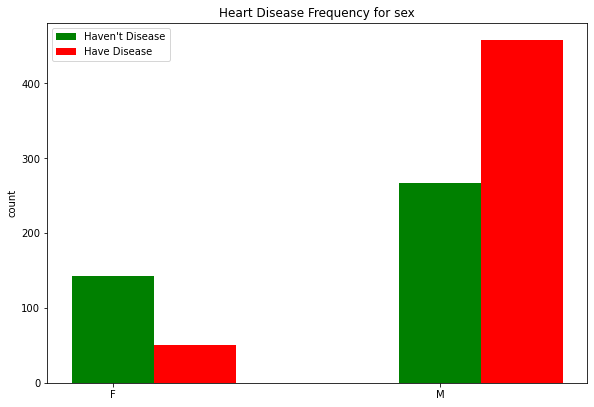

In [8]:
sql_statement="""select distinct b.sex,a.HeartDisease, count(a.HeartDisease) count from Heart_Disease a
                inner join sex b on b.sex_id=a.sex
                group by a.sex,a.HeartDisease
    """
df2 = pd.read_sql_query(sql_statement, conn)
display(df2)

t_1 = df2[ df2['HeartDisease'] == 0 ]['count']
t_2 = df2[ df2['HeartDisease'] == 1 ]['count']
Labels=df2.sex.drop_duplicates()
X=np.arange(len(Labels))

fig = plt.figure()
ax = fig.add_axes([0,0,1.25,1.25])
ax.bar(X + 0.00, t_1, color = 'g', width = 0.25)
ax.bar(X + 0.25, t_2, color = 'r', width = 0.25)
plt.xticks(X, Labels)
plt.title('Heart Disease Frequency for sex')
plt.ylabel('count')
plt.legend(["Haven't Disease", "Have Disease"])

# Distribution of Heart Diseases w.r.t Fasting Blood Sugar

FastingBS  HeartDisease  count
0         0             0    366
1         0             1    338
2         1             0     44
3         1             1    170

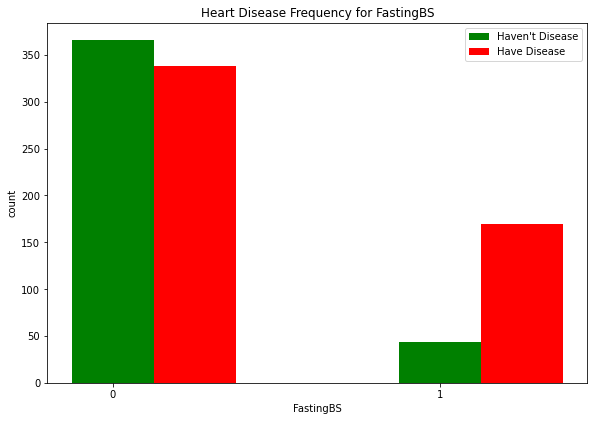

In [9]:
sql_statement="""select distinct b.FastingBS,a.HeartDisease, count(a.HeartDisease) count from Heart_Disease a
                inner join FastingBS b on b.FastingBS_id=a.FastingBS
                group by a.FastingBS,a.HeartDisease
    """
df2 = pd.read_sql_query(sql_statement, conn)
display(df2)

t_1 = df2[ df2['HeartDisease'] == 0 ]['count']
t_2 = df2[ df2['HeartDisease'] == 1 ]['count']
Labels=df2.FastingBS.drop_duplicates()
X=np.arange(len(Labels))

fig = plt.figure()
ax = fig.add_axes([0,0,1.25,1.25])
ax.bar(X + 0.00, t_1, color = 'g', width = 0.25)
ax.bar(X + 0.25, t_2, color = 'r', width = 0.25)
plt.xticks(X, Labels)
plt.title('Heart Disease Frequency for FastingBS')
plt.ylabel('count')
plt.xlabel('FastingBS')
plt.legend(["Haven't Disease", "Have Disease"])

# Heart Diseases w.r.t Exercise Angina

ExerciseAngina  HeartDisease  count
0              N             0    355
1              N             1    192
2              Y             0     55
3              Y             1    316

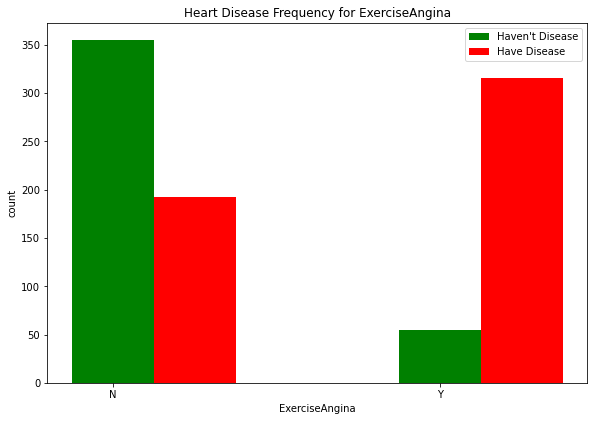

In [10]:
sql_statement="""select distinct b.ExerciseAngina,a.HeartDisease, count(a.HeartDisease) count from Heart_Disease a
                inner join ExerciseAngina b on b.ExerciseAngina_id=a.ExerciseAngina
                group by a.ExerciseAngina,a.HeartDisease
    """
df2 = pd.read_sql_query(sql_statement, conn)
display(df2)

t_1 = df2[ df2['HeartDisease'] == 0 ]['count']
t_2 = df2[ df2['HeartDisease'] == 1 ]['count']
Labels=df2.ExerciseAngina.drop_duplicates()
X=np.arange(len(Labels))

fig = plt.figure()
ax = fig.add_axes([0,0,1.25,1.25])
ax.bar(X + 0.00, t_1, color = 'g', width = 0.25)
ax.bar(X + 0.25, t_2, color = 'r', width = 0.25)
plt.xticks(X, Labels)
plt.title('Heart Disease Frequency for ExerciseAngina')
plt.ylabel('count')
plt.xlabel('ExerciseAngina')
plt.legend(["Haven't Disease", "Have Disease"])

# Correlation Plot

<AxesSubplot:>

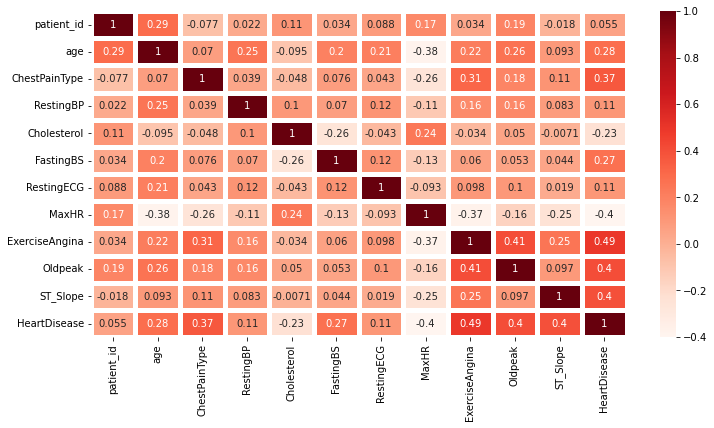

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(df3.corr(), cmap='Reds', annot=True, linewidths=5)

# Model Fit

# Train and Test Split

In [12]:
X = df3.drop('HeartDisease',axis = 1)
Y = df3['HeartDisease']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(solver='liblinear',C=0.1)
LGR.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

# Confusion Matrix_Logistic

In [15]:
from sklearn.metrics import classification_report
print (classification_report(y_test,LGR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.84      0.87      0.86       123

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230



# Random Forest 

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(max_depth=6,n_estimators=1200,oob_score=True)
clf_RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=1200, oob_score=True)

# Confusion Matix_Random Forest

In [17]:
from sklearn.metrics import classification_report
print("oob_score:",clf_RF.oob_score_)
print (classification_report(y_test,clf_RF.predict(X_test)))

oob_score: 0.876453488372093
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       107
           1       0.85      0.94      0.90       123

    accuracy                           0.88       230
   macro avg       0.89      0.88      0.88       230
weighted avg       0.89      0.88      0.88       230



# Support Vector Machines(SVM)

In [18]:
from sklearn.svm import SVC
clf_SVM=SVC(C=50,kernel='rbf')
clf_SVM.fit(X_train,y_train)

SVC(C=50)

# Confusion Matrix_SVM

In [19]:
from sklearn.metrics import classification_report
print (classification_report(y_test,clf_SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       107
           1       0.73      0.78      0.76       123

    accuracy                           0.73       230
   macro avg       0.73      0.73      0.73       230
weighted avg       0.73      0.73      0.73       230



# Conclusion Based on model(Logistic, Random Forest and SVM) performance

### Random Forest is the best Model based on Accuracy, Precision, Recall and F1-Score.

# Conclusion for the Problem statement:

### Heart Disease(Yes/No) depends majorly on Independent variables like Age, Cholestrol, Fasting Blood Sugar, Blood pressure, Excercie Agenica, MaxHR, OldPeak and Slope.
### Solution for the Heart Disease problem statement is Controlling the cholestrol, BP, Fasting Blood sugar and Stress levels. Also, Exercise is mandatory five times a week and General Medical check ups like ECG should be taken for every three to six months gap to predict the Heart Disease at early stage.